# Numerical Methods Project 

Suppose we have a system 

$$ \dot{x} = a - x - \frac{4xy}{1+x^2}$$
$$\dot{y} = bx\left(1-\frac{y}{1+x^2}\right)$$

with the initial conditions, 

$$x(0) = 0$$
$$y(0) = 1$$

which represents the amount of chemical species $x$ and $y$ over time as they react with each other and a third species which has, essentially, a constant amount. 


The true values of the parameters $(a,b)$ are $(10,4)$. However, when taking measurements in the experiment we naturally obtain measurement error of the data $\hat{x}(t)$ and  $\hat{y}(t)$. We can explore this scenario as follows:

## 1. Simulate the system from $t=0$ to $t=100$ for the true parameters to obtain data $\hat{x}(t)$ and  $\hat{y}(t)$ (the hat notation just helps us specify which simulation data is true).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2

<font color="blue">
Note: The font with the <span style="font-family:monospace;">type:monospace</span> specifically means the string is a <span style="font-family:monospace;">function</span> in all the markdown cell.
</font>

<font color="blue">
<p>
It is a system derived from Lengyel-Epstein model for the chlorite-iodide-malonic acid. Similiarly, it can be resolved as what we did for the chaos system with an implicit method in the lecture.
</p>
    
<p>    
Algorithmically, implicit methods consist of an extra approximate root-finding solution (e.g., secent method used here since no analytic solution for the derivative) which leads a more time-consuming result. Overall, each of the code cells takes no more than around 3 minutes to run.
</p>
    
<p>
Define "<span style="font-family:monospace;">F</span>" (for root-finding) and "<span style="font-family:monospace;">y_yield</span>" (for new y values)
</p>    

<p>
Then, by means of "secent method", we use "<span style="font-family:monospace;">x_yield</span>" to find the solution for x. It is because we cannot find the analytic solution for the derivative $\frac{\partial F}{\partial x}$, we need to define "<span style="font-family:monospace;">num_dFdx</span>" to find the numerical solution for $\frac{\partial F}{\partial x}$.
</p>    
</font>

In [2]:
def y_yield(x_old,y_old):
    '''
    Find the next y value from the previous x,y old value.
    
    Input
    -----
        x_old: scalar, value of latest simulation for x
        y_old: scalar, value of latest simulation for y
        
    Output
    ------
        'returned value': scalar, value calculated from latest simulation of x,y (i.e.,x_old,y_old)
    
    '''
    return (dt*b*x_old+y_old)/(1+dt*b*x_old/(1+x_old**2))
    
def F(x_new,x_old,y_old):
    '''
    Defind as a function for the root-finding problem with RH Riemann approximation.
    
    Input
    -----
        x_new: scalar, 
        x_old: scalar, value of latest simulation for x
        y_old: scalar, value of latest simulation for y
        
    Output
    ------
        'returned value': scalar, value calculated from latest simulation of x,y (i.e.,x_old,y_old)
    
    '''
    return -x_new+x_old+dt*(a-x_new-4*x_new*(dt*b*x_old+y_old)/(1+dt*b*x_old/(1+x_old**2))/(1+x_new**2))

In [3]:
def num_dFdx(x0,x1,f,x_old,y_old):
    '''
    Numerical solution for the derivative of f
    
    Input
    -----
        x0: scalar, one of the x values for the variable x on f(x)
        x1: scalar, another x value for the variable x on f(x)
        f: function, function needs for the derivative
        x_old: scalar, value of latest simulation for x
        y_old: scalar, value of latest simulation for y
        
    Output
    ------
        'returned value': scalar, numerical solution for the derivative of function f at x0
    
    '''
    return (f(x1,x_old,y_old)-f(x0,x_old,y_old))/(x1-x0)

def x_yield(x0,x1,f,x_old,y_old,tol=1e-2):
    '''
    Performs Secant Method of root finding on f(x). Also plots linear approximation of first three guesses.
    
    Input
    -----
        x0: scalar, initial guess of root
        x1: scalar, second guess of root
        f: function, function we are solving for root
        x_old: scalar, value of latest simulation for x
        y_old: scalar, value of latest simulation for y
        tol: float, tolerance of the error for the root-finding problem with a default value:1e-2
        
    Output
    ------
        x_array[-1]: scalar, best guess via Secant's method
    
    '''
    # initial set up
    x_array = [x0,x1]
    
    # standard procedure for the secant method, while making sure the denominator is not zero.
    # If so,ZeroDivisionError will raise as an error message
    if num_dFdx(x0,x1,f,x_old,y_old) != 0:
        while abs(f(x_array[-1],x_old,y_old)) > tol:
            x0 = x_array[-2]
            x1 = x_array[-1]
            if num_dFdx(x0,x1,f,x_old,y_old) == 0:
                raise ZeroDivisionError('division by zero')
            x2 = x1 - (f(x1,x_old,y_old)/num_dFdx(x0,x1,f,x_old,y_old))
            x_array.append(x2)
    else:
        raise ZeroDivisionError('division by zero')

    return x_array[-1]

In [4]:
def xy_yield(F,x_old,y_old):
    '''
    Find the next x,y value from the previous x,y old value.
    
    Input
    -----
        F: function, function we are solving for root
        x_old: scalar, value of latest simulation for x
        y_old: scalar, value of latest simulation for y
        
    Output
    ------
        x_new: scalar, best guess via Secant's method in function x_yield
        y_new: scalar, value calculated from latest simulation of x_old,y_old in fucntion y_yield
    '''
    # recall the function x_yield and y_yield to calculate the next x_new,y_new values
    x_new = x_yield(x_old,x_old+0.1,F,x_old,y_old) # x_new for F is set as x_old+0.1 as a reasonable guess for the root-finding problem
     
    y_new = y_yield(x_old, y_old)
    
    return x_new, y_new

In [5]:
def run(F,x0,y0,n):
    '''
    Find all the computed x,y values of the system in n time steps
    
    Input
    -----
        F: function, function we are solving for root
        x0: scalar, initial condition for x of the system
        y0: scalar, initial condition for y of the system
        n: number of iterations for solving new x,y values (time steps)
        
    Output
    ------
        x_sol_ans: list, all the computed x values of the system in n time steps
        y_sol_ans: list, all the computed y values of the system in n time steps
    '''
    # Set the initial condition for x and y
    x_sol_ans = [x0]
    y_sol_ans = [y0]
    
    # 'for' loop to solve the ODE for n times between T=0 to T=100
    for i in range(0,n):
        x_ans, y_ans = xy_yield(F,x_sol_ans[-1],y_sol_ans[-1])
        x_sol_ans.append(x_ans)
        y_sol_ans.append(y_ans)
        
    return x_sol_ans, y_sol_ans


# set global parameters for initial conditions
x0 = 0
y0 = 1

a=10
b=4

T = 100
dt = 0.001
n = int(T/dt)

# Create a array for all the t values in time unit
time_seq = np.arange(0,T+dt,dt)

# define this function, so that everytime recalling it will set all the initial parameters
def set_para(x0y0=[0,1],ab=[10,4],Tdt=[100,0.001]):
    '''
    Set global parameters for initial conditions
    
    Input
    -----
        x0y0: list, the initial condition of x,y for the system
        ab: list, the parameters of a,b for the system
        Tdt: list, the first is the time duration for the simulation, and the second is time step
        
    Output
    ------
        allSet: string, print all the current parameters of the system
    '''
    # recall the global variable outside the function
    global x0,y0,a,b,T,dt,n,time_seq
    x0,y0=x0y0[0],x0y0[1]
    a,b=ab[0],ab[1]
    T,dt=Tdt[0],Tdt[1]
    n = int(T/dt)
    time_seq = np.arange(0,T+dt,dt)
    allSet = print('Initial conditions are set to:','\nx0=',x0,', y0=',y0,';\na=',a,', b=',b,';\nT=',T,', dt=',dt,';\nn=',n)
    # 'if' condition sentences to check if the length of time_seq is consistent with the number of time steps 
    # Note: len(time_seq) will include T=0, so the length is one more than the number of time steps in the duration
    if len(time_seq) == n+1:
        print("'time_seq' is set.")
    else:
        print('time_seq is not set.')
    return allSet

Initial conditions are set to: 
x0= 0 , y0= 1 ;
a= 10 , b= 4 ;
T= 100 , dt= 0.01 ;
n= 10000
'time_seq' is set.


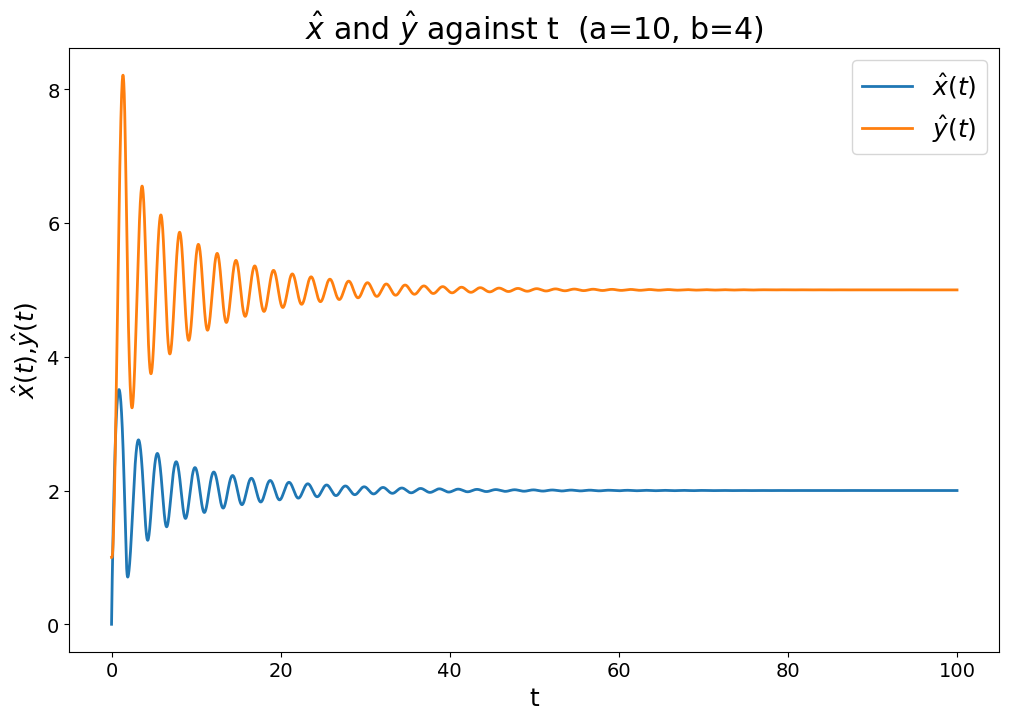

In [6]:
#set all the parameters for the system
initial_condi = set_para([0,1],
                         [10,4],
                         [100,0.01])

#according to the parameters above, run and get all the x_hat, y_hat values in two lists (x_sol4,y_sol4)
#the number '4' behind 'x_sol','y_sol','time_seq' means they are specifical variables for the condition: b=4.
x_sol4, y_sol4 = run(F,x0,y0,n)
time_seq4 = time_seq

#plot the graph of x_hat(t) and y_hat(t) with a=10, b=4
plt.title(r'$\hat{x}$ and $\hat{y}$ against t  (a=10, b=4)')

plt.plot(time_seq4,x_sol4,label = r'$\hat{x}(t)$')
plt.plot(time_seq4,y_sol4,label = r'$\hat{y}(t)$')

plt.xlabel('t')
plt.ylabel(r'$\hat{x}(t)$,$\hat{y}(t)$')
plt.legend()
plt.show()


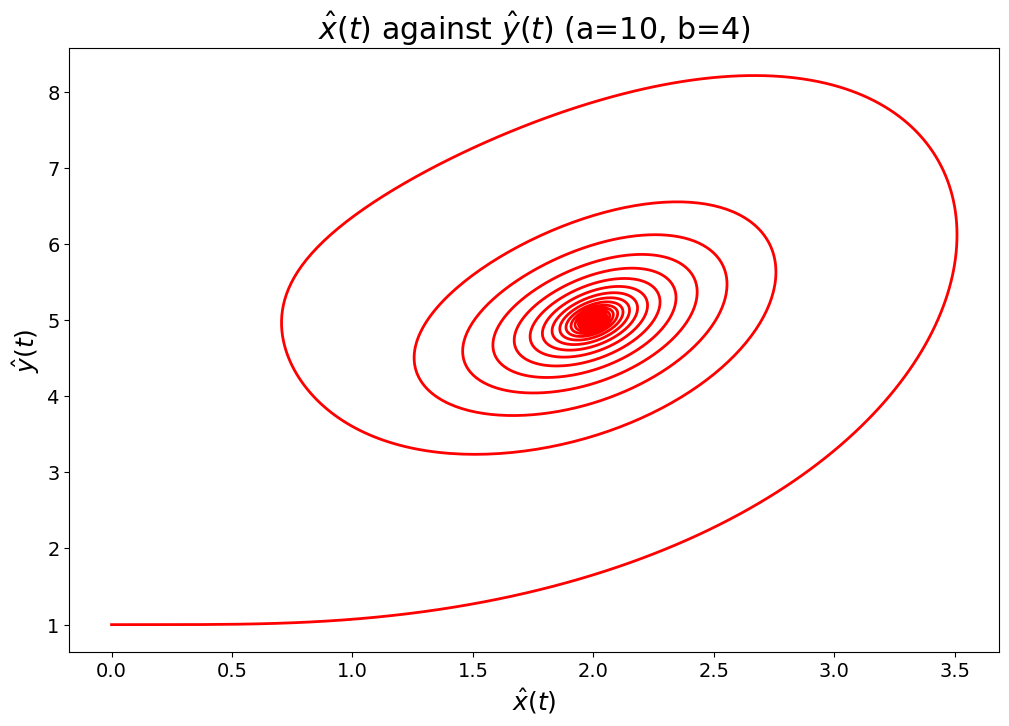

In [7]:
#plot the graph of y_hat(t) against x_hat(t) with a=10, b=4
plt.title(r'$\hat{x}(t)$ against $\hat{y}(t)$ (a=10, b=4)')

plt.plot(x_sol4,y_sol4, color='r')

plt.xlabel(r'$\hat{x}(t)$')
plt.ylabel(r'$\hat{y}(t)$')
plt.show()

<font color="blue">
It is noticed the line in the second graph (the one right above) starts at (0,1) and ends at a point in the center. It verifies with the condition $$b>b_H= \frac{3a^{2}-125}{5a\sigma}$$ for $a>\sqrt{125/3}$
    
<p>
,which the system will finalise into a steady state, i.e., a point at the center.
</p> 
<p>
$\sigma=1$ because it is assumed to have no complexing agent in this ODE system.
</p>
    
   
</font>

## 2. We do not have an analytic solution to compare the results with. However, we can tell that the system seems to settle down onto a steady state, where both $x$ and $y$ no longer change. For the ODE system, consider the $x$ and $y$ values which ensure $\dot{x} = 0$ and $\dot{y} = 0$. What are these values and are the simulations consistent with these values?

In [8]:
def indexOf(t_stamp):
    '''
    Return the index of t_stamp in the 'time_seq' array
    
    Input
    -----
        t_stamp: float, in time unit
        
    Output
    ------
        'returned': float, the index of t_stamp in the 'time_seq' array
    '''
    return np.where(time_seq == t_stamp)[0][0]

def num_dfdt(sol,sol_t,t):
    '''
    Numerical solution for the derivative of sol  
    
    Input
    -----
        sol: list, solution for the system
        sol_t: list, values of time for the whole simulation in time unit
        t: time stamp for the derivative
        
    Output
    ------
        'returned': scalar, numerical solution for the derivative of function sol at the time stamp
    
    '''
    return (sol[indexOf(t)]-sol[indexOf(t)+1])/(sol_t[indexOf(t)]-sol_t[indexOf(t)+1])

<font color="blue">When $\dot{x} = 0$ and $\dot{y} = 0$:

The equations become:
$$\dot{x} = a - x - \frac{4xy}{1+x^2}$$
$$\dot{y} = bx\left(1-\frac{y}{1+x^2}\right)=0$$

Solve from $\dot{y}$ first,
$$\Rightarrow bx\left(1-\frac{y}{1+x^2}\right)=0 $$
$$\Rightarrow y = {1+x^2} \tag{1}$$

Substitute (1) into $ \dot{x} = a - x - \frac{4xy}{1+x^2} = 0$,
given $a = 10, b = 4$ here, 
$$\Rightarrow 10 = x + \frac{4x\left(1+x^2\right)}{1+x^2}$$
$$\Rightarrow 10 = x + 4x$$
$$\Rightarrow 10 = 5x$$
$$\Rightarrow x = 2 \tag{2}$$ 

Resubstitute (2) into (1) to get y,
$$ y = {1+x^2} \tag{1}$$
$$ x = 2 \tag{2}$$
$$ \Rightarrow y = 1+2^2$$
$$ \Rightarrow y = 5$$

Hence,
$$\begin{cases} & x = 2\\& y = 5 \end{cases}$$
</font>



<font color="blue">
To check where the $\hat{x}(t)$ and $\hat{y}(t)$ go to zero, plot the graph for $\dot{x}(t)$ and $\dot{y}(t)$.
</font>

Initial conditions are set to: 
x0= 0 , y0= 1 ;
a= 10 , b= 4 ;
T= 100 , dt= 0.01 ;
n= 10000
'time_seq' is set.


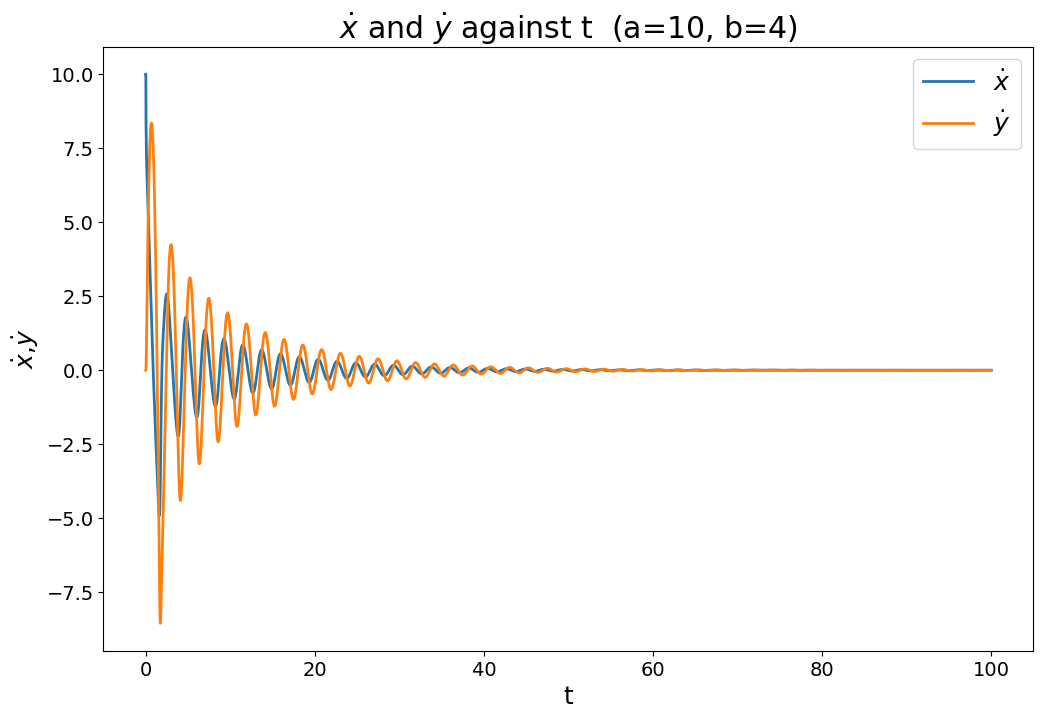

In [9]:
#set all the parameters for the system, with dt=0.01 for a short stimulation time
# obtain the solution lists for x,y
initial_condi = set_para([0,1],
                         [10,4],
                         [100,0.01])
x_sol_Q2, y_sol_Q2 = run(F,x0,y0,n)

#initilise the empty lists for the value dxdt,dydt and the time list in time unit.
dxdt=[]
dydt=[]
dfdt_t_seq=[]

# Run the function to abtain the lists of derivatives
for i in range(0,n):
    dxdt.append(num_dfdt(x_sol_Q2,time_seq,time_seq[i]))
    dydt.append(num_dfdt(y_sol_Q2,time_seq,time_seq[i]))
    dfdt_t_seq.append(time_seq[i])

#plot the graph for x_dot(t),y_dot(t) as a justification.
plt.title(r'$\dot{x}$ and $\dot{y}$ against t  (a=10, b=4)')

plt.plot(dfdt_t_seq,dxdt,label = r'$\dot{x}$')
plt.plot(dfdt_t_seq,dydt,label = r'$\dot{y}$')

plt.xlabel('t')
plt.ylabel(r'$\dot{x}$,$\dot{y}$')
plt.legend()
plt.show()

## 3. Interpret the results from problems 1 and 2.

<font color="blue">
<p>
To relate to theoretical numerical solution of the ODE system and answer the questions in Problem 2, the equations under <b>Problem 2</b> derived mathematically with the initial condition $\dot{x} = 0$ and $\dot{y} = 0$ shows that the x=2,y=5.
</p>    
<p>
The solution is consistent with the graph <b>'$\dot{x}$ and $\dot{y}$ against t  (a=10, b=4)'</b>. When $\dot{x} = 0$ and $\dot{y} = 0$, t is more than aound 60. Given that t>60 and back to the graph <b>'$\hat{x}$ and $\hat{y}$ against t  (a=10, b=4)'</b> under <b>Problem 1</b> , the x and y clearly equal to 2,5 respectively.
</p>
    
<p>
Hence, we can draw the conclusion that the theoretically stimulated solutions $\hat{x}(t)$ and $\hat{y}(t)$ is correct from the aspect that $\dot{x} = 0$ and $\dot{y} = 0$.
</p>
</font>

## 4. Add random noise in the form of normally distributed random values to the true data from the previous simulation, $\hat{x}(t)$ and $\hat{y}(t)$. This reflects the measurement error. We can write the data with error as $\tilde{x}(t)$ and $\tilde{y}(t)$. To obtain this data, set

## $$\tilde{x} = \hat{x}(t) + np.random.normal(0,\sigma, len(\hat{x}))$$
## $$\tilde{y} = \hat{y}(t) + np.random.normal(0,\sigma, len(\hat{y}))$$

## for $\sigma = 0.1$. 

## Plot the new data.

Initial conditions are set to: 
x0= 0 , y0= 1 ;
a= 10 , b= 4 ;
T= 100 , dt= 0.01 ;
n= 10000
'time_seq' is set.


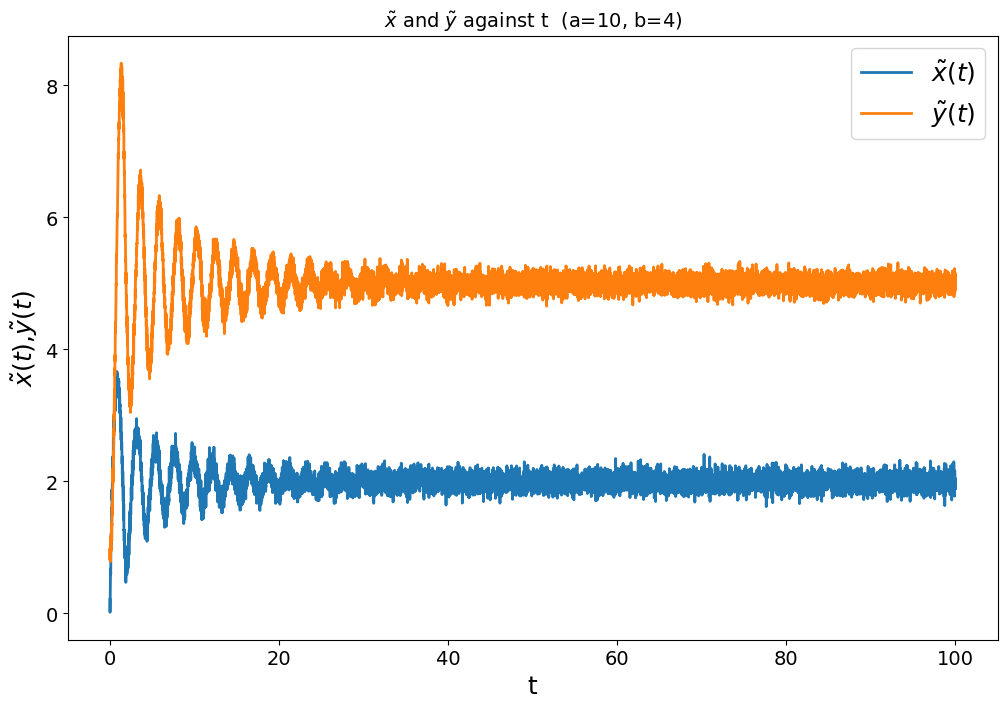

In [10]:
#set all the parameters for the system
initial_condi = set_para([0,1],
                         [10,4],
                         [100,0.01])
x_sol4, y_sol4 = run(F,x0,y0,n)
time_seq4 = time_seq

# Set the parameter of sigma for the random normal distri. 
sigma = 0.1
x_sol4_exp = np.array(x_sol4) + np.random.normal(0,sigma,len(x_sol4))
y_sol4_exp = np.array(y_sol4) + np.random.normal(0,sigma,len(y_sol4))

#Plot the graph with the random noise as the experimental data sets
plt.title(r'$\tilde{x}$ and $\tilde{y}$ against t  (a=10, b=4)', fontsize=14)

plt.plot(time_seq4,x_sol4_exp,label = r'$ \tilde{x}(t)$')
plt.plot(time_seq4,y_sol4_exp,label = r'$ \tilde{y}(t)$')

plt.xlabel('t')
plt.ylabel(r'$\tilde{x}(t)$,$\tilde{y}(t)$')
plt.legend()
plt.show()

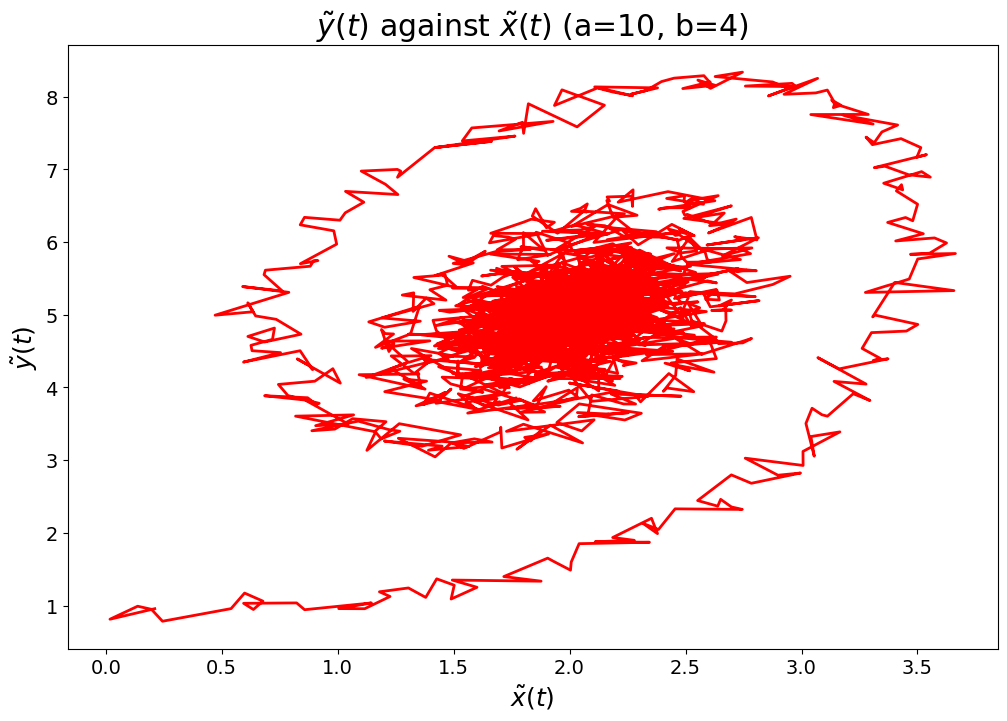

In [11]:
#plot the graph of y_tilde(t) against x_tilde(t) with a=10, b=4
plt.title(r'$\tilde{y}(t)$ against $\tilde{x}(t)$ (a=10, b=4)')

plt.plot(x_sol4_exp,y_sol4_exp, color='r')

plt.xlabel(r'$\tilde{x}(t)$')
plt.ylabel(r'$\tilde{y}(t)$')
plt.show()

<font color="blue">
The graph above clearly shows how the random error we would face in the real lab enviroment
</font>

## 5. Fit a new simulation to the data that is now corrupted by measurement error by first setting the parameters to $(a,b) = (10,3)$ and using an optimisation algorithm to find the best values of the parameter $b$ such that for the new simulation $x(t)$ and $y(t)$,

## $$L_2 = || \tilde{x} - x|| + ||\tilde{y} - y|| $$

## is minimised. Note that 

## $$|| \tilde{x} - x|| = \frac{1}{N}\sum_i^N (\tilde{x}(t_i) - x(t_i))^2$$
## $$|| \tilde{y} - y|| = \frac{1}{N}\sum_i^N (\tilde{y}(t_i) - y(t_i))^2$$


In [12]:
def L2(b_para):
    '''
    Defines the sum of square error between correct experiemental data and new simulation data with wrong guess for b
    
    Input
    -----
        b_para: float, the initial parameter b for the ODE system
        
    Output
    ------
        'returned': sum of square error
    '''
    # Globalise b to use the parameter of the function outside itself
    global b
    b=b_para
    
    x_sol3, y_sol3 = run(F,x0,y0,n)
    x_sol3_exp = np.array(x_sol3)
    y_sol3_exp = np.array(y_sol3)
    
    return (sum((x_sol3_exp - x_sol4_exp)**2)+sum((y_sol3_exp - y_sol4_exp)**2))/n

Initial conditions are set to: 
x0= 0 , y0= 1 ;
a= 10 , b= 4 ;
T= 100 , dt= 0.02 ;
n= 5000
'time_seq' is set.


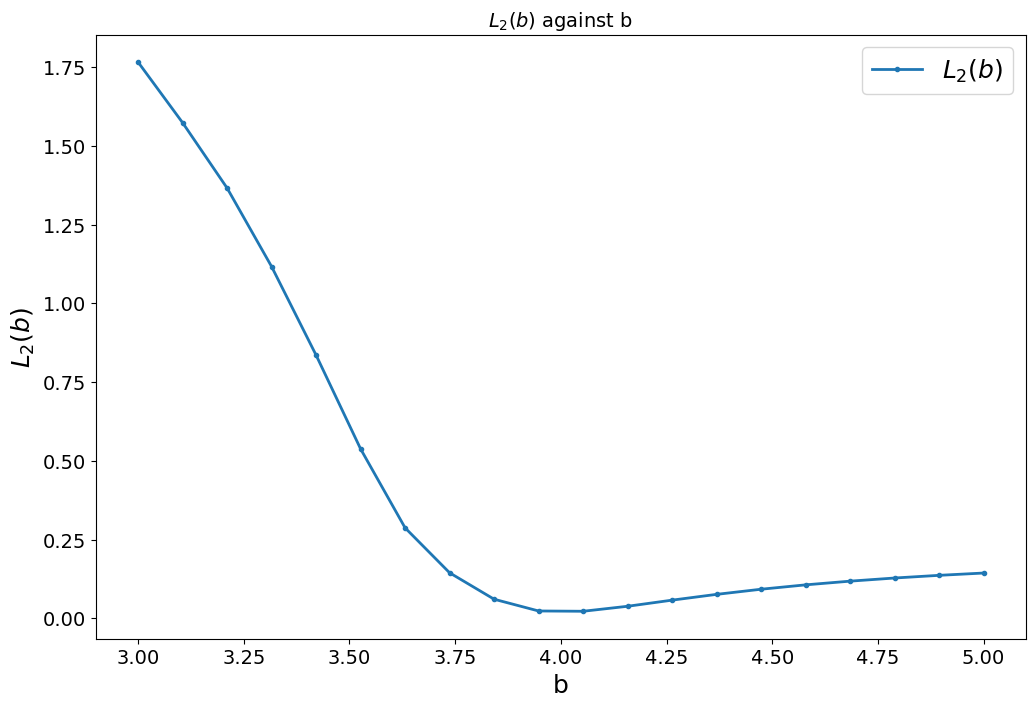

In [13]:
#plot L(b) with a few sampled points
#set all the parameters for the system, and re-obtain solution lists under this parameter set
initial_condi = set_para([0,1],
                         [10,4],
                         [100,0.02])
x_sol4, y_sol4 = run(F,x0,y0,n)
x_sol4_exp = x_sol4 + np.random.normal(0,sigma,len(x_sol4))
y_sol4_exp = y_sol4 + np.random.normal(0,sigma,len(y_sol4))

#Plot the L_2(b) against b
bList = np.linspace(3,5,20)
L2List = []
for i in bList:
    #print(L2(i))
    L2List.append(L2(i))
    
plt.title(r'$L_2(b)$ against b', fontsize=14)

plt.plot(bList,L2List,marker='.',label = r'$L_2(b)$')

plt.xlabel('b')
plt.ylabel(r'$L_2(b)$')
plt.legend()
plt.show()

<font color="blue">
The graph right above shows there is a lowest point we then can utilise the gradient desent method to find the lowest point, where L2(b) will be the smallest (almost zero), indicating the function with that b value will be the most fitted to the original function
</font>

In [14]:
def num_dLdb(f,b_guess0,b_guess1):
    '''
    Numerical solution for the derivative of f
    
    Input
    -----
        b_guess0: scalar, one of the b values for the variable b on f(b)
        b_guess1: scalar, another b value for the variable b on f(b)
        f: function, function needs for the derivative
        
    Output
    ------
        'returned value': scalar, numerical solution for the derivative of function f at b=b_guess0
    
    '''
    return (f(b_guess0)-f(b_guess1))/(b_guess0-b_guess1)


def GD_L2(f,b0,lamb,tol=0.01):
    '''
    Performs the gradient descent algorithm in function f(b)
    
    Inputs
    ------
        f: function, the gradient of the function we want to minimize
        b0: scalar, initial condition for b
        lamb: scalar, lambda value of step size
        tol: float, tolerance of the error for the root-finding problem with a default value=0.01

        
    Outputs
    -------
        GD_b_seq: list, all the iterated values which are guessed for minimizing value
    '''
    # Initialise the condition with b1=b0+1 as a second guess for the root-finding problem
    b1=b0+0.1
    GD_b_seq = [b0,b1]
    
    while abs(num_dLdb(f,b0,b1)) > tol:
        b0 = GD_b_seq[-2]
        b1 = GD_b_seq[-1]
        b2 = b1 - (lamb*num_dLdb(f,b0,b1))

        GD_b_seq.append(b2)
        print("b:",b1)
        #print('lamb',lamb)
        #print("num_dLdb",num_dLdb(f,b0,b1))
        #print('lamb*dLdb',lamb*num_dLdb(f,b0,b1))

    return GD_b_seq

b: 3.1
b: 3.282976354202208
b: 3.492573817742852
b: 3.762280741143288
b: 3.9528694468952246
b: 4.003967339972676
b: 4.009746670940516
b: 4.00818292464232
b: 4.006149674054924
b: 4.004514562524247
b: 4.00329152887321


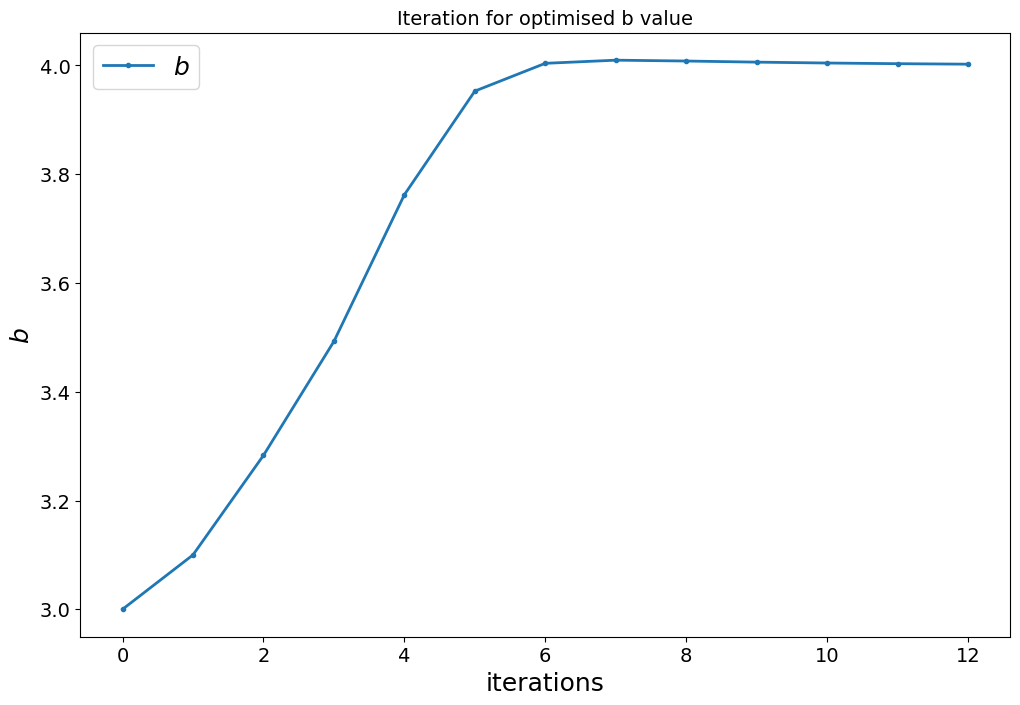

In [15]:
GD_b_iter = GD_L2(L2,3.0,0.1)

#plot the iteration for optimised b
plt.title(r'Iteration for optimised b value', fontsize=14)

plt.plot(GD_b_iter,marker='.',label = r'$b$')

plt.xlabel('iterations')
plt.ylabel(r'$b$')
plt.legend()
plt.show()

<font color="blue">
As the iteration goes, the value will get close the 4.0, which is the optimal value of the new simulation data.
</font>

## 6. More realistically, we will have far fewer experimental data points. Suppose we have a measurement every 10 time units. Downsample the data with error $\tilde{x}$ and $\tilde{y}$ to reflect this measurement frequency. For example, if you have $dt = 0.1$ then you need to select every 100 data points in the arrays $\tilde{x}$ and $\tilde{y}$. This can be done with the following code,

## $$\tilde{x}_{subsample} = \tilde{x}[::100]$$

## where the number after the two colons is the frequency of subsampling, i.e. $\tilde{x}_{subsample}$ will contain the values $\tilde{x}[0], \tilde{x}[99],\tilde{x}[199], \tilde{x}[299], \cdots$ 

## Repeat problem 5 with this subsample. Note that for the norm of the simulation against the subsample, you will need to downsample the simulation exactly as you have downsampled the measurement data. For example, 

## $$L_2 = || \tilde{x}_{subsample} - x[::100]|| + ||\tilde{y}_{subsample} - y[::100|| $$

In [23]:
def L2_dnspl(b_para):
    '''
    Defines the sum of square error between correct experiemental data and new simulation data with wrong guess for b
    
    Input
    -----
        b_para: float, the initial parameter b for the ODE system
        
    Output
    ------
        'returned': sum of square error
    '''
    global b
    b=b_para
    interval = int(10/dt)
    
    x_sol3, y_sol3 = run(F,x0,y0,n)
    x_sol3_exp = np.array(x_sol3)
    y_sol3_exp = np.array(y_sol3)
    
    return (sum((x_sol3_exp[::interval] - x_sol4_exp[::interval])**2)+sum((y_sol3_exp[::interval] - y_sol4_exp[::interval])**2))/len(y_sol4_exp[::interval])

In [26]:
# get the global variable, so that random.normal wont change everytime they are executed.
x_sol4_exp = x_sol4 + np.random.normal(0,sigma,len(x_sol4))
y_sol4_exp = y_sol4 + np.random.normal(0,sigma,len(y_sol4))

b: 3.1
b: 3.1664654043152747
b: 3.33408058592994
b: 3.508661626269659
b: 3.8241110534771225
b: 3.941589596202211
b: 3.967716993224432
b: 3.96955496985345


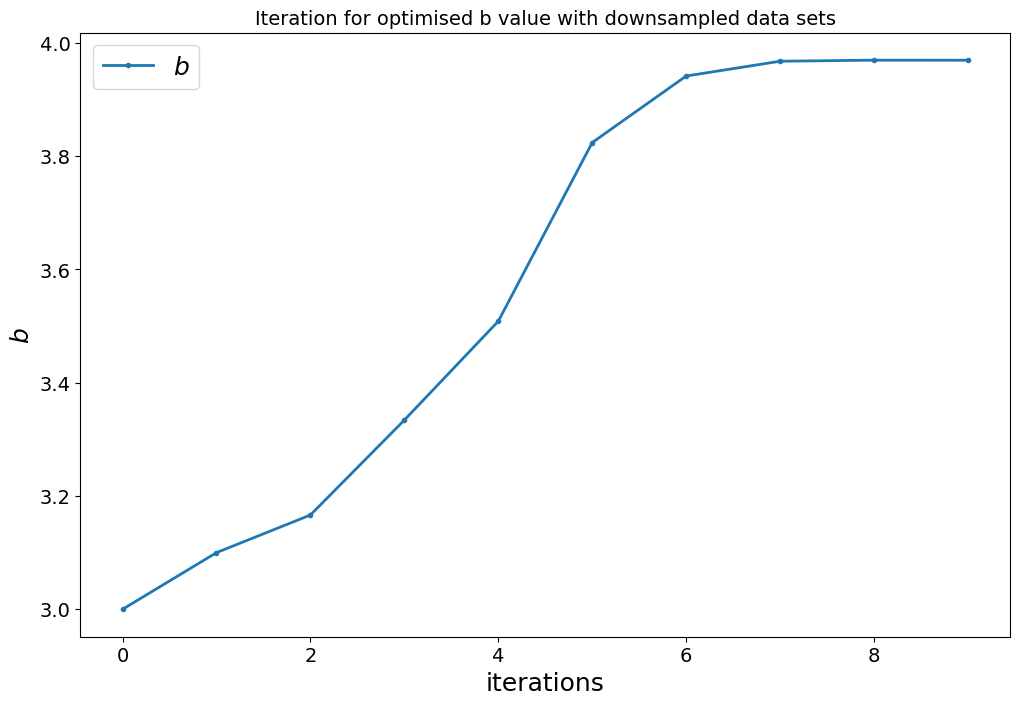

In [27]:
GD_b_iter = GD_L2(L2_dnspl,3.0,0.1)

#plot the iteration for optimised b with downsampled data sets
plt.title(r'Iteration for optimised b value with downsampled data sets', fontsize=14)

plt.plot(GD_b_iter,marker='.',label = r'$b$')

plt.xlabel('iterations')
plt.ylabel(r'$b$')
plt.legend()
plt.show()

<font color="blue">
Similarly, it will give b=4.0 in the end
</font>

## 7. Because this is an idealised system, we can find some interesting but less-than-physical behaviours. For example, the system can settle into a cyclic exchange between the species $x$ and $y$. Let the parameters be $(a,b) = (10,3)$. Simulate this ODE system.

Initial conditions are set to: 
x0= 0 , y0= 1 ;
a= 10 , b= 3 ;
T= 100 , dt= 0.001 ;
n= 100000
'time_seq' is set.


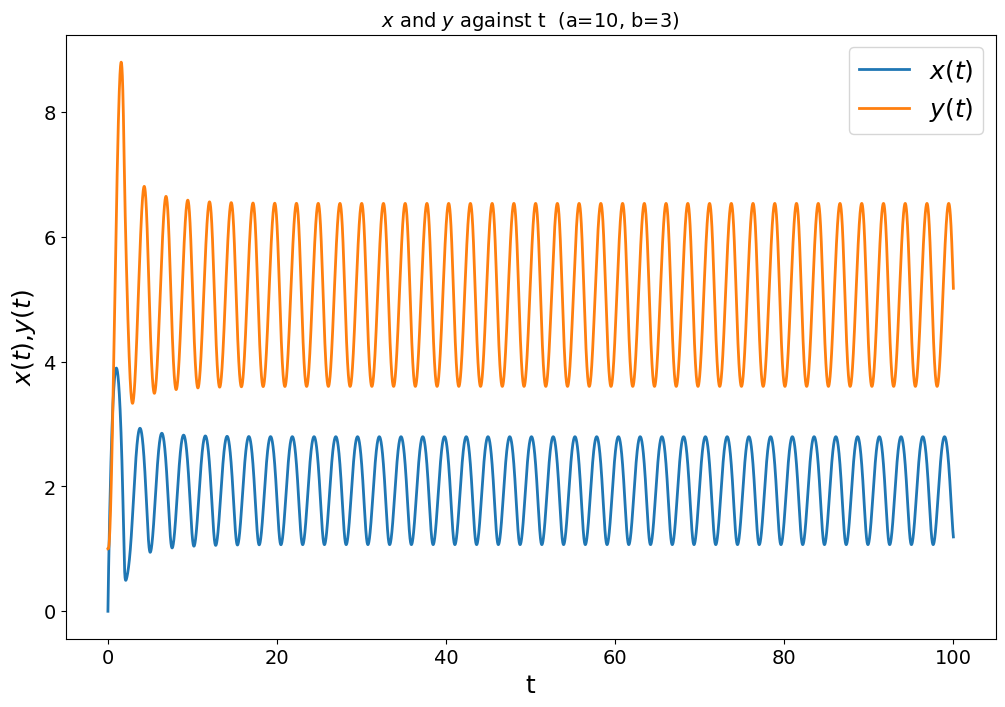

In [28]:
#
initial_condi = set_para([0,1],
                         [10,3],
                         [100,0.001])

sol_t_seq = np.arange(0,T+dt,dt)
x_sol3, y_sol3 = run(F,x0,y0,n)

#plot x and y against t at b=3, it has a steady period 
plt.title(r'$x$ and $y$ against t  (a=10, b=3)', fontsize=14)

plt.plot(sol_t_seq,x_sol3,label = r'$x(t)$')
plt.plot(sol_t_seq,y_sol3,label = r'$y(t)$')

plt.xlabel('t')
plt.ylabel(r'$x(t)$,$y(t)$')
plt.legend()
plt.show()

## 8. Given $a=10$ and $0<b<3.5$, the system converges to what is called a limit cycle. We can find the period of the cycle by first letting the system enter the cycle and then calculating the time until the values $(x(t),y(t))$ repeat themselves. 

## For $(a,b) = (10,3)$, simulate the first 100 time units and then solve for the time $T^* = 100 + T_{period}$ such that 

## $$ (x(t = 100) - x(t = T^*) )^2  - (y(t = 100) - y(t = T^*) )^2 = 0$$ 


<font color="blue">
    Define "P" (for the root-finding problem)
</font>

In [29]:
def P(x_sol_prd,y_sol_prd,index_pin):
    '''
    Defind as a function to find the period after T=100.
    
    Input
    -----
        x_sol_prd: list, one of the x values for the variable x on f(x)
        y_sol_prd: list, another x value for the variable x on f(x)
        index_pin: integer, value of T in index unit
        
    Output
    ------
        'returned value': scalar, function G value calculated from x,y at T=index_pin in index unit
    
    '''
    L2_x = (x_sol_prd[indexOf(100)]-x_sol_prd[index_pin])**2
    L2_y = (y_sol_prd[indexOf(100)]-y_sol_prd[index_pin])**2
    return L2_x-L2_y

def num_dPdt(P,x_sol_prd,y_sol_prd,index_pin):
    '''
    Numerical solution for the derivative of P
    
    Input
    -----
        f: function, function needs for the derivative
        x_sol_prd: list, one of the x values for the variable x on f(x)
        y_sol_prd: list, another x value for the variable x on f(x)
        index_pin: integer, value of T in index unit
        
    Output
    ------
        'returned value': scalar, numerical solution for the derivative of function P at index_pin
    
    '''
    return (P(x_sol_prd,y_sol_prd,index_pin)-P(x_sol_prd,y_sol_prd,index_pin-1))/dt

In [36]:
def T_yield(b_para,tol=1e-03):
    '''
    Define to find the period for the G(0) after T=100 according to numerical derivative of P
    
    Inputs
    ------
        f: function, the gradient of the function we want to minimize
        b_para: scalar, initial condition for b
        tol: float, tolerance of the error for the root-finding problem with a default value=1e-04

        
    Outputs
    -------
        T_period: scalar, in the time unit for a complete period after T=100
    '''    
    
    global b
    b = b_para
    
    x_sol_prd, y_sol_prd = run(F,x0,y0,n)
    x_last, y_last = xy_yield(F,x_sol_prd[-1],y_sol_prd[-1])
    x_sol_prd.append(x_last)
    y_sol_prd.append(y_last)
    index_pin = indexOf(100)
    index_pin += 1
    
    P_list = [0,P(x_sol_prd,y_sol_prd,index_pin)]    
    P_condi = P_list[-1]
    
    dPdt_List = [num_dPdt(P,x_sol_prd,y_sol_prd,indexOf(100))]
    dPdt_condi = num_dPdt(P,x_sol_prd,y_sol_prd,index_pin)
    dPdt_List.append(dPdt_condi)
    
    # as I find, two conditions can be used to get the value.
    # both P and dPdt can be at local minimum or maximul and saddle point, vice versa
    # the 'if' and 'elif' is use to select the point with p=0 for both conditions mentioned above
    while True:
        if len(P_list) >2000 and dPdt_List[-1]*dPdt_List[-2]<0 and abs(P_condi)<tol:
            T_period = (index_pin - indexOf(100))/1000
            return T_period
        elif len(P_list) >2000 and P_list[-1]*P_list[-2]<0 and abs(dPdt_condi)<tol:
            T_period = (index_pin - indexOf(100))/1000
            return T_period
        else:
            x_last, y_last = xy_yield(F,x_sol_prd[-1],y_sol_prd[-1])
            x_sol_prd.append(x_last)
            y_sol_prd.append(y_last)
            index_pin = index_pin+1
            
            P_list.append(P(x_sol_prd,y_sol_prd,index_pin))
            P_condi = P_list[-1]
            
            dPdt_List.append(num_dPdt(P,x_sol_prd,y_sol_prd,index_pin))
            dPdt_condi = dPdt_List[-1]

## 9. Solve for the values of $T_{period}$ for parameter values $b$ in $numpy.linspace(2,3.5,10)$ 


In [ ]:
initial_condi = set_para([0,1],
                         [10,3],
                         [100,0.001])
#plot T against b value
b_List = np.linspace(2,3.5,10)
T_sol = []

#
for i in bList:
    print('b=',i)
    print(T_yield(i))
    T_sol.append(T_yield(i))

plt.plot(bList,T_sol,marker='.')

Initial conditions are set to: 
x0= 0 , y0= 1 ;
a= 10 , b= 3 ;
T= 100 , dt= 0.001 ;
n= 100000
'time_seq' is set.
b= 3.5
2.371
b= 3.611111111111111
2.188
b= 3.7222222222222223
2.294
b= 3.8333333333333335
2.317
b= 3.9444444444444446
